## Exercise 4.9 - Intro to Data Visualization with Python Task - Part II

### Step 1 - Create a new notebook, import the necessary analysis and visualization libraries, 
### then import your most up-to-date project data 

In [59]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [60]:
# assign the folder path to the variable 'path'

path=r"C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Python Fundamentals\Nov-2023 Instacart Basket Analysis"

In [61]:
# import the combined pickle file from prepared data folder prepared in Part 1 of this task

df_allmerge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','allmergedata_1.pkl'))

In [62]:
# displays all rows when listed

pd.options.display.max_rows = None

In [63]:
# displays all columns when listed

pd.options.display.max_columns = None

In [64]:
# check the imported dataset

df_allmerge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge_flag,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average spent,spending flag,regularity,order frequency flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,family_status,income,_merge
0,2539329.00000,1.00000,1.00000,2.00000,8.00000,NaN,196.00000,1.00000,0.00000,Soda,77.00000,7.00000,9.00000,both,Mid-range product,Regular day,Most orders,11.00000,Regular customer,6.36780,Low spender,20.00000,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795.00000,1.00000,2.00000,3.00000,7.00000,15.00000,196.00000,1.00000,1.00000,Soda,77.00000,7.00000,9.00000,both,Mid-range product,Least busy day,Fewest orders,11.00000,Regular customer,6.36780,Low spender,20.00000,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747.00000,1.00000,3.00000,3.00000,12.00000,21.00000,196.00000,1.00000,1.00000,Soda,77.00000,7.00000,9.00000,both,Mid-range product,Least busy day,Most orders,11.00000,Regular customer,6.36780,Low spender,20.00000,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736.00000,1.00000,4.00000,4.00000,7.00000,29.00000,196.00000,1.00000,1.00000,Soda,77.00000,7.00000,9.00000,both,Mid-range product,Least busy day,Fewest orders,11.00000,Regular customer,6.36780,Low spender,20.00000,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534.00000,1.00000,5.00000,4.00000,15.00000,28.00000,196.00000,1.00000,1.00000,Soda,77.00000,7.00000,9.00000,both,Mid-range product,Least busy day,Most orders,11.00000,Regular customer,6.36780,Low spender,20.00000,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


### Step 2 - create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### Bar chart

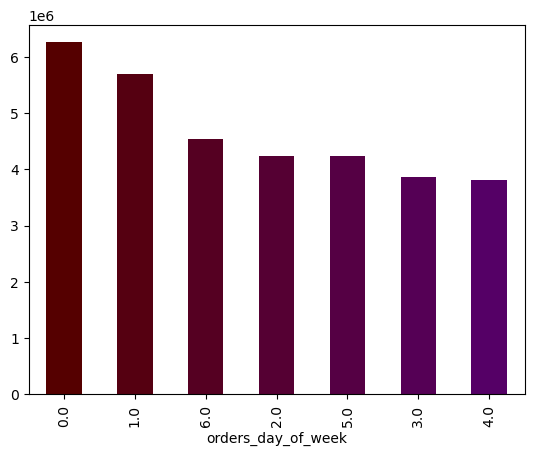

In [65]:
# create a bar chart showing frequency of 'orders_day_of_week' column
# by default the observations are ordered from largest to smallest.

bar=df_allmerge['orders_day_of_week'].value_counts().plot.bar(color=['#500','#501','#502','#503','#504','#505','#506'])

In [66]:
# print frequency table

df_allmerge['orders_day_of_week'].value_counts()

orders_day_of_week
0.00000    6252941
1.00000    5696724
6.00000    4530304
2.00000    4243173
5.00000    4236989
3.00000    3868747
4.00000    3812390
Name: count, dtype: int64

In [67]:
# export 'bar' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

### Histogram

<Axes: ylabel='Frequency'>

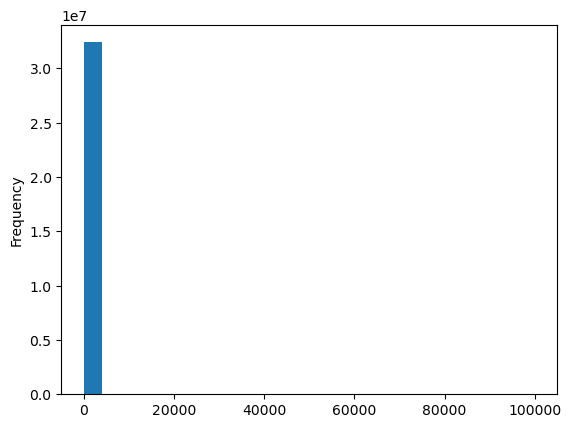

In [68]:
# create a histogram of the “prices” column

df_allmerge['prices'].plot.hist(bins=25)

### check for specific statistics to get each value

In [69]:
# mean

df_allmerge['prices'].mean()

11.980225638383445

In [70]:
# median

df_allmerge['prices'].median()

7.4

In [71]:
# max

df_allmerge['prices'].max()

99999.0

### While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result, 99,999
### which is forcing your histogram to shove all the small values into one bar and the extreme value in another one. 
### And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

### Another way to explore your data is to create a scatterplot.
### Normally, you’d use scatterplots to investigate the relationship between two variables.
### However, when conducting an exploratory analysis, you can also use scatterplots to visualize
### the distribution of data points in order to identify any outliers.

In [72]:
# to check the outlier, see if there are any values above a certain threshold in your data, 
# for instance, anything above the “normal” price of a supermarket item.
# If you imagined the maximum price anyone would pay in a supermarket were around $100, 
# then anything above that amount could be considered an outlier.

df=df_allmerge.loc[df_allmerge['prices']>100]

In [73]:
# dimension shows the no.of rows affected by outlier values

df['prices'].shape

(5127,)

In [74]:
# List 'product_id' ,'product_name'& 'prices' columns for all products with prices greater than 100

df_allmerge[df_allmerge['prices']>(100)][['product_id','product_name','prices']]

,product_id,product_name,prices
7877,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
7878,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
15268,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
20424,33664.00000,2 % Reduced Fat Milk,99999.00000
20663,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
22663,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
22664,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
22665,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
22666,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000
30676,21553.00000,Lowfat 2% Milkfat Cottage Cheese,14900.00000


### There are 5127 observations with prices>100 which are considered outliers.
### Lowfat 2% Milkfat Cottage Cheese and 2 % Reduced Fat Milk are the 2 products causing outlier values.  These need to be fixed.

In [75]:
# For 'Lowfat 2% Milkfat Cottage Cheese' replace prices with the value 4.49 (closest approximation to market price)

df_allmerge.loc[(df_allmerge['product_name']=='Lowfat 2% Milkfat Cottage Cheese') & (df_allmerge['prices']>100),"prices"]=4.49

In [76]:
# For '2 % Reduced Fat Milk' replace prices with the value 3.09 (closest approximation to market price)

df_allmerge.loc[(df_allmerge['product_id']==33664.0) & (df_allmerge['prices']>100),"prices"]=3.09

### Check if values above 100 have been replaced with appropriate prices

In [77]:
df_allmerge[df_allmerge['product_id']==(21553.0)][['product_id','product_name','prices']]

,product_id,product_name,prices
7877,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
7878,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
15268,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
20663,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
22663,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
22664,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
22665,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
22666,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
30676,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000
30677,21553.00000,Lowfat 2% Milkfat Cottage Cheese,4.49000


In [78]:
df_allmerge[df_allmerge['product_id']==(33664.0)][['product_id','product_name','prices']]

,product_id,product_name,prices
20424,33664.00000,2 % Reduced Fat Milk,3.09000
56082,33664.00000,2 % Reduced Fat Milk,3.09000
56083,33664.00000,2 % Reduced Fat Milk,3.09000
61063,33664.00000,2 % Reduced Fat Milk,3.09000
70469,33664.00000,2 % Reduced Fat Milk,3.09000
70470,33664.00000,2 % Reduced Fat Milk,3.09000
99487,33664.00000,2 % Reduced Fat Milk,3.09000
148761,33664.00000,2 % Reduced Fat Milk,3.09000
232902,33664.00000,2 % Reduced Fat Milk,3.09000
232903,33664.00000,2 % Reduced Fat Milk,3.09000


In [79]:
# look for the max price.  Before replacing prices>100 with nan max value used to be 99999.0

df_allmerge['prices'].max()

25.0

In [80]:
# Look values greater than 100

df_allmerge.loc[df_allmerge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge_flag,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average spent,spending flag,regularity,order frequency flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,family_status,income,_merge


### Scatterplot

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

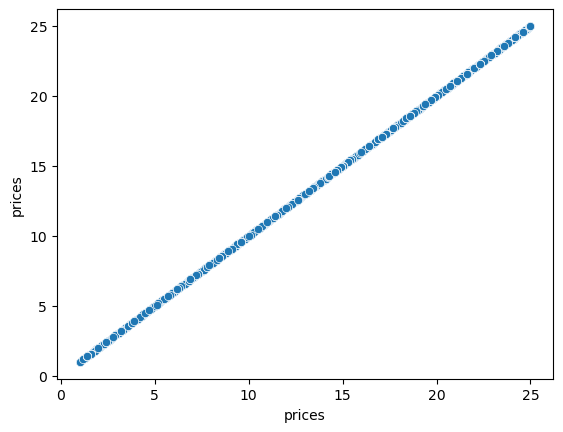

In [81]:
# create a scatterplot with prices in both the axes since we are trying to look at the outliers in price column

sns.scatterplot(x='prices',y='prices',data=df_allmerge)

### Histogram

<Axes: ylabel='Frequency'>

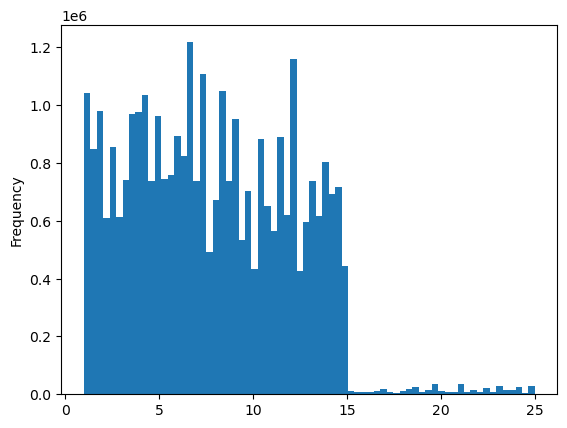

In [82]:
# create a histogram of the “prices” column after the outliers have been handled
# Increasing the number of bins will allow you to see more variety in your histogram.

df_allmerge['prices'].plot.hist(bins=70)

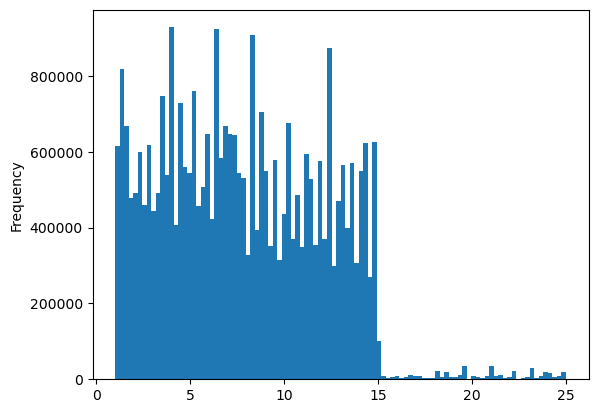

In [83]:
# assign the histogram to an object 'hist' 

hist=df_allmerge['prices'].plot.hist(bins=100)

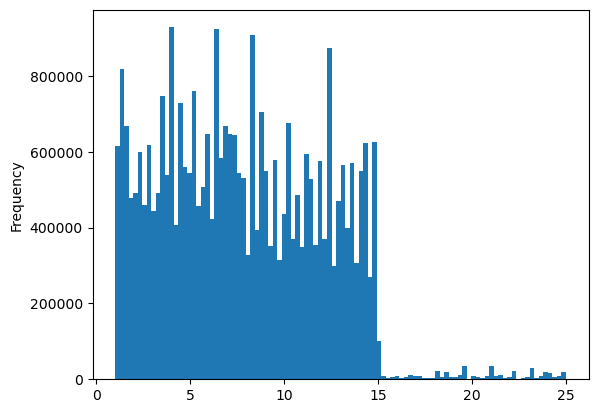

In [84]:
# assign the histogram to an object 'hist2' 

hist2=df_allmerge['prices'].plot.hist(bins=100)

In [85]:
# export the histogram object to '04 Analysis' folder

hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_orders_dow.png'))

### Line Charts

In [86]:
# “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers 
# (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command.

np.random.seed(4)

In [87]:
# create a new list called dev. This will be what stores your boolean values—you’ll be getting an output 
# of True or False for every value based on whether it’s less than or equal to 0.7
# np.random.rand() function being used as your argument is what will actually create your list of 
# random floating numbers between 0 and 1. 
# The np at the beginning stands for the NumPy library, the random in the middle is a function that creates 
# random numbers, and the rand at the end is a function that ensures the random numbers generated by random 
# follow the uniform distribution. 
# Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur
# in the distribution.
# Within the brackets of this function, you’ll see len(ords_prods_merge). This len() produces a value that represents 
# the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32641268, 
# which is how many rows are in your dataframe. 

dev=np.random.rand(len(df_allmerge))<=0.7

In [88]:
# check what is in dev

dev.shape

(32641268,)

In [89]:
# see what happend when the function is used with a number as argument

np.random.rand(10)

array([0.79227379, 0.54149571, 0.53109233, 0.3016315 , 0.91662146,
       0.90125835, 0.66776966, 0.2148013 , 0.31056132, 0.19891516])

In [90]:
# Since the list 'dev' contains 32641268 random numbers, store 70% of the smaple in dataframe big

big=df_allmerge[dev]

In [91]:
#check the number of rows and columns in 'big'

big.shape

(22849745, 33)

In [92]:
# store 30% of the smaple in dataframe small 

small=df_allmerge[~dev]

In [93]:
#check the number of rows and columns in 'small'

small.shape

(9791523, 33)

In [94]:
# check the number of rows in ords_prods_merge dataframe

len(df_allmerge)

32641268

In [95]:
# number of rows in the lists 'big' and 'small' together should be equal to 'len(ords_prods_merge)'

len(big)+len(small)

32641268

In [96]:
# To improve the speed, reducing your samples to only those columns necessary for the chart

df_2=small[['orders_day_of_week','prices']]

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

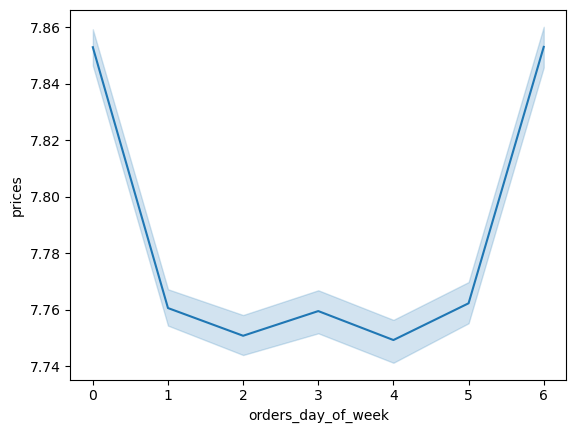

In [97]:
# Create a line chart

line1=sns.lineplot(data=df_2,x='orders_day_of_week',y='prices')

In [98]:
# export 'line1' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

line1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_orders_dow.png'))

### Step 3 - provide the Instacart senior stakeholders with descriptive findings about sales

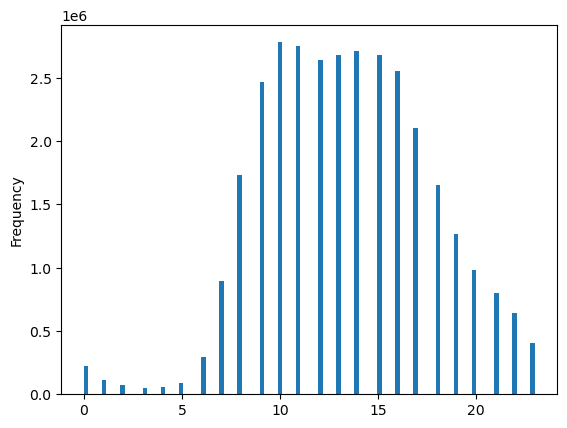

In [99]:
# Create a histogram of the “order_hour_of_day” column

hist_hod=df_allmerge['order_hour_of_day'].plot.hist(bins=100)

In [100]:
# Suppress scientific notation in describe function

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# descriptive statistics of the column'order_hour_of_day'

df_allmerge['order_hour_of_day'].describe()

count   32641268.00000
mean          13.42599
std            4.24622
min            0.00000
25%           10.00000
50%           13.00000
75%           16.00000
max           23.00000
Name: order_hour_of_day, dtype: float64

#### There are no outliers in 'order_hour_of_day' column.  The values range between 0 and 23 which is as expected.  Average is 13. There are 32641268 values in this column.
####  Highest sales occur between 9 hours and 16 hours, 10 hours being the highest.
#### The least sales happen during 0 hours and 5 hours

In [101]:
# export 'hist_hod' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

hist_hod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_order_hod.png'))

### Step 4 - Create a bar chart

In [102]:
df_allmerge['loyalty_flag'].value_counts()


loyalty_flag
Regular customer    16381472
Loyal customer      10679578
New customer         5580218
Name: count, dtype: int64

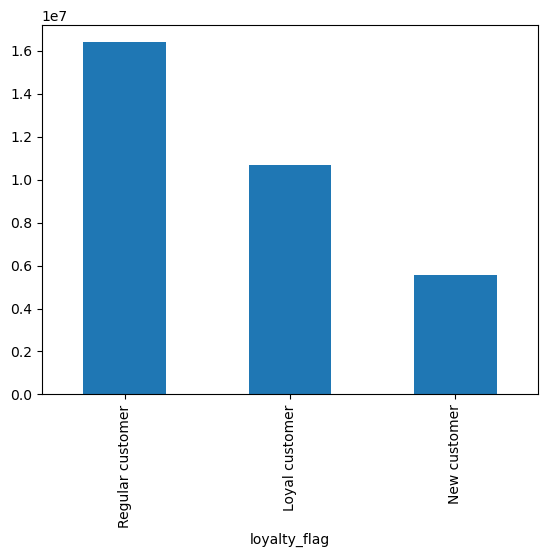

In [103]:
# create a bar chart from loyalty_flag column

bar_loyalty=df_allmerge['loyalty_flag'].value_counts().plot.bar()

In [104]:
# export 'bar_loyalty' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_flag.png'))

### Step 5 - Check whether there’s a difference in expenditure

In [105]:
# Accurate sampling

np.random.seed(20)

In [119]:
df_allmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641268 entries, 0 to 32641267
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                float64       
 1   user_id                 float64       
 2   order_number            float64       
 3   orders_day_of_week      float64       
 4   order_hour_of_day       float64       
 5   days_since_prior_order  float64       
 6   product_id              float64       
 7   add_to_cart_order       float64       
 8   reordered               float64       
 9   product_name            object        
 10  aisle_id                float64       
 11  department_id           float64       
 12  prices                  float64       
 13  merge_flag              category      
 14  price_range_loc         object        
 15  Busiest days            object        
 16  busiest_period_of_day   object        
 17  max_order               float64       
 18  

In [117]:
# To improve the speed, reducing your samples to only those columns necessary for the chart

df_3=small[['order_hour_of_day','average spent']]

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

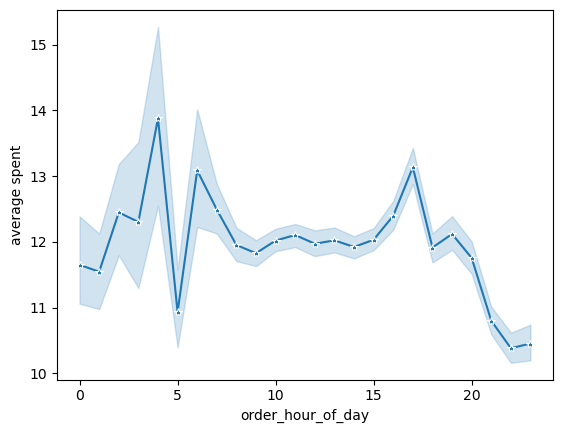

In [121]:
# Create a line chart

line2=sns.lineplot(data=df_3,x='order_hour_of_day',y='average spent',marker='*')

In [122]:
# export 'line2' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

line2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_hod.png'))

#### The expenditure is highest at around 04, 06 and 17 hours and the least aound 10 hours.  Time has effect on expenditure.

### Step 6 - determine whether there’s a connection between age and family situation 

In [109]:
# Accurate sampling

np.random.seed(20)

In [110]:
# To improve the speed, reducing your samples to only those columns necessary for the chart

df_4=small[['age','no_of_dependants']]

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

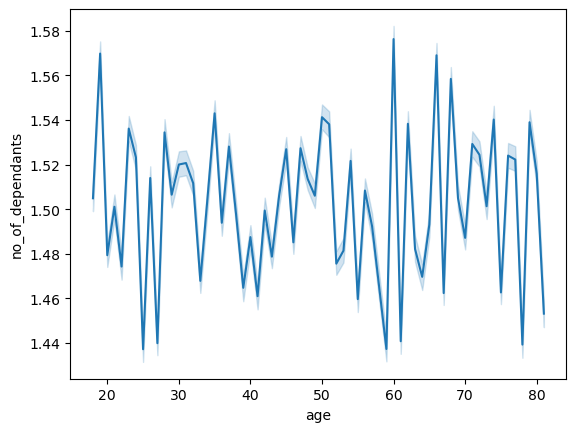

In [111]:
# Create a line chart

line3=sns.lineplot(data=df_4,x='age',y='no_of_dependants')

#### There is a high fluctuation in no. of dependants through all the ages.
#### I do not see any correlation between these 2 columns.

In [112]:
# export 'line3' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

line3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_dependance.png'))

### Step 7 - explore whether there’s a connection between age and spending power (income)

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


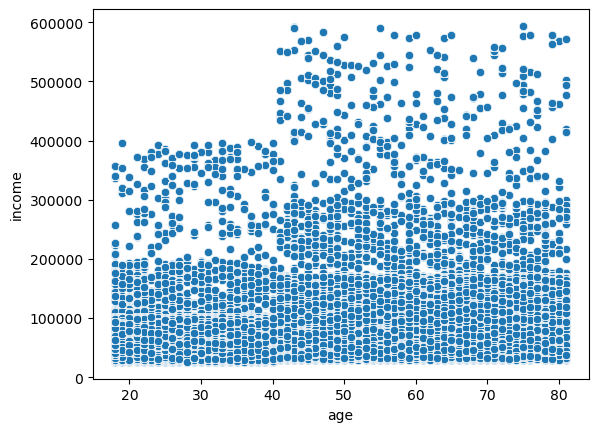

In [113]:
# create a scatterplot to check if there is a connection between age and income

scatter=sns.scatterplot(x='age',y='income',data=df_allmerge)

#### There definitely is a correlation between age and the spending power.  
#### People in 40 years plus age group has higher income when compared to the age group 20-40.

In [114]:
# export 'scatter' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_age_spending.png'))

In [115]:
# export df_allmerge dataframe as pickle file

df_allmerge.to_pickle(os.path.join(path,'02 Data','Prepared Data','allmergedata_final.pkl'))